# Final Project Submission

* Student name: Natalia Quintero
* Student pace: Full time
* Scheduled project review date/time: Friday, February 22/2019. 10:00am
* Instructor name: Rafael Carrasco
* Blog post URL: https://naquech.github.io/ 

-----------

## Methodology

### OSEMN

<b>Obtain</b> Gather information, obtain the data.

<b>Scrub</b> Clean, reduce noise, remove data that is not needed; check, remove or replace missing or null values, extract columns or format data types.

<b>Explore</b> Set up the data, check for multicollinearity, make sure the dataset meets what is necessary for the type of model to apply later on.

<b>Model</b> Implement a classification algorithm(s), tune parameters and adjust the ones you have to try and increase accuracy in the results.

<b>Interpret</b> Draw conclusions, evaluate the results.

## Data Set 
The Census Income is a popular data set used for classification in Machine Learning; it's used to classify a person's income in two groups based on census data. The groups are people who earn more than 50,000/year, and those who earn less than 50,000/year. The data set contains 14 attributes and 48,842 instances.

### Question
Does a person make more than 50K a year?

## Data Acquisition

This data set was extracted by Barry Becker from the 1994 Census database, the data set can be found at UCI as Census Income Data Set (a.k.a Adult data set). The contents will be downloaded from the website a converted into data frames for further exploration.

In [1]:
import pandas as pd
import numpy as np
import io
import requests
import os

import warnings
warnings.filterwarnings('ignore')

In [13]:
#template - download url and save it in a local directory

def downloadSet(path, url):
    if not os.path.exists(path):
        os.mkdir(path)

    for i in url_list:
        data = requests.get(i).content
        filename = os.path.join(path, os.path.basename(i))
        with open(filename, "wb") as file:
            file.write(data)

In [14]:
# Load dataset to local env

url_list = ['http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', 
        'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' ]

downloadSet('data', url_list)

### Observations
By looking at the file, both data sets don't have column names, there are white spaces in between values, and the first row in the test set file is a text column. 

In [2]:
# Add column names from Attribute information list

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
          'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [3]:
data = pd.read_csv('data/adult.data', names=columns, sep=' *, *', engine='python')
test = pd.read_csv('data/adult.test', names=columns, skiprows=1, sep=' *, *', engine='python')

In [4]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### Concatenate both test and training set

In [5]:
#Dataframe concatenation

data_full = pd.concat([data, test])
data_full.shape

(48842, 15)

In [6]:
data_full.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


-----------

## Cleaning 

* Missing values / nan
* Correlation of features
* Class imbalance
* Scale
* Treat categorical columns

In [7]:
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [8]:
#check data types
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [9]:
# Check for null values

data_full.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

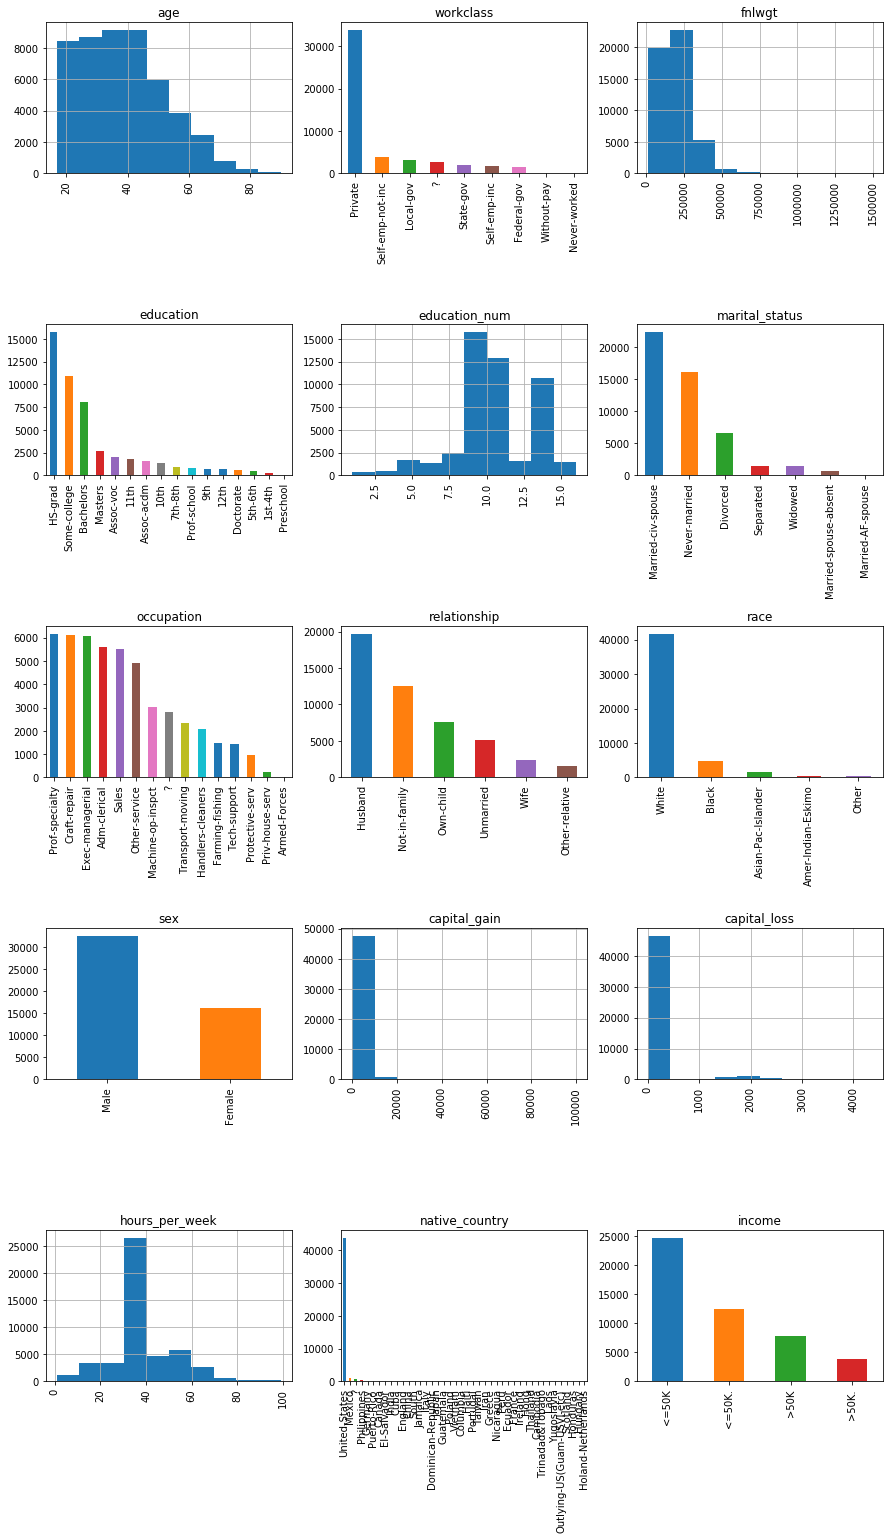

In [10]:
# Check overall distribution of features

fig = plt.figure(figsize=(15,25))
cols = 3
rows = math.ceil(float(data_full.shape[1])/cols)

for i, column in enumerate(data_full.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_full.dtypes[column] == np.object:
        data_full[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_full[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
        
plt.subplots_adjust(hspace=1.0, wspace=0.2)

### Observations
* There are placeholders in two of the categorical features
* The income feature needs to be consolidated

In [11]:
#Remove placeholders

data_full.drop(data_full[data_full.workclass == '?'].index, inplace=True)
data_full.drop(data_full[data_full.occupation == '?'].index, inplace=True)

In [12]:
# New shape of the data frame

data_full.shape

(44244, 15)

In [13]:
# Income feature - remove the dots (from the test set)

data_full.loc[data_full['income'] == '<=50K.', 'income'] = '<=50K'
data_full.loc[data_full['income'] == '>50K.', 'income'] = '>50K'

In [14]:
data_full['income'].value_counts()

<=50K    33246
>50K     10998
Name: income, dtype: int64

### Categorical features

Perform label encoding.

In [15]:
from sklearn import preprocessing

In [16]:
#Function to label encode categories in a Dataframe

def encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [17]:
df_encoded, _ = encode_features(data_full)
df_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,39,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,39,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,39,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,39,0
5,37,2,284582,12,14,2,3,5,4,0,0,0,40,39,0


#### NOTE

After label encoding our income feature changes: income <=50K is encoded in value 0; income > 50K is encoded in value 1.

Now, check again the distribution:

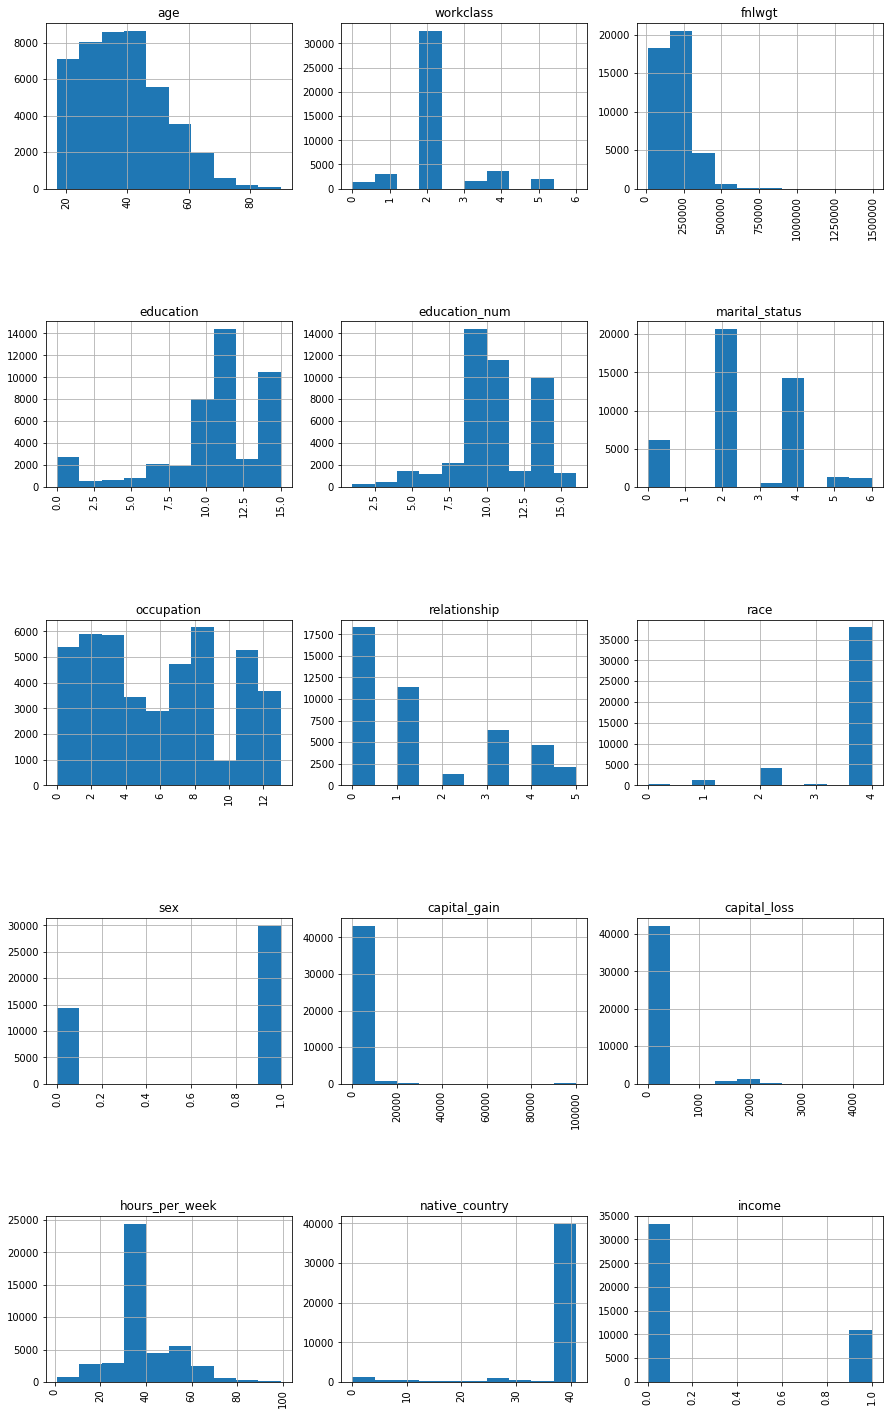

In [18]:
fig = plt.figure(figsize=(15,25))
cols = 3
rows = math.ceil(float(df_encoded.shape[1])/cols)

for i, column in enumerate(df_encoded.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if df_encoded.dtypes[column] == np.object:
        df_encoded[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df_encoded[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
        
plt.subplots_adjust(hspace=0.8, wspace=0.2)

------------

## Exploration

* Analyze descriptive statistics
* Correlation of features
* Define target variable and features
* Normalization - if needed

### Descriptive Statistics

In [19]:
df_encoded.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,44244.000000,44244.000000,4.424400e+04,44244.000000,44244.000000,44244.000000,44244.000000,44244.000000,44244.000000,44244.000000,44244.000000,44244.000000,44244.000000,44244.000000,44244.000000
mean,38.542198,2.204841,1.898261e+05,10.309737,10.126209,2.584599,5.982122,1.412033,3.670961,0.676679,1104.956989,88.840860,40.952604,36.736959,0.248576
std,13.196844,0.956298,1.054937e+05,3.817887,2.562031,1.496905,4.021771,1.598308,0.843357,0.467749,7532.416480,405.051437,12.001269,7.793194,0.432192
min,17.000000,0.000000,1.349200e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176060e+05,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,2.000000,1.783840e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,47.000000,2.000000,2.377290e+05,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,6.000000,1.490400e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


#### Observations
As seen on the description above, there are different numerical ranges for the features, so this set will need to be scaled later for modeling.

### Correlation of features

In [20]:
import seaborn as sns

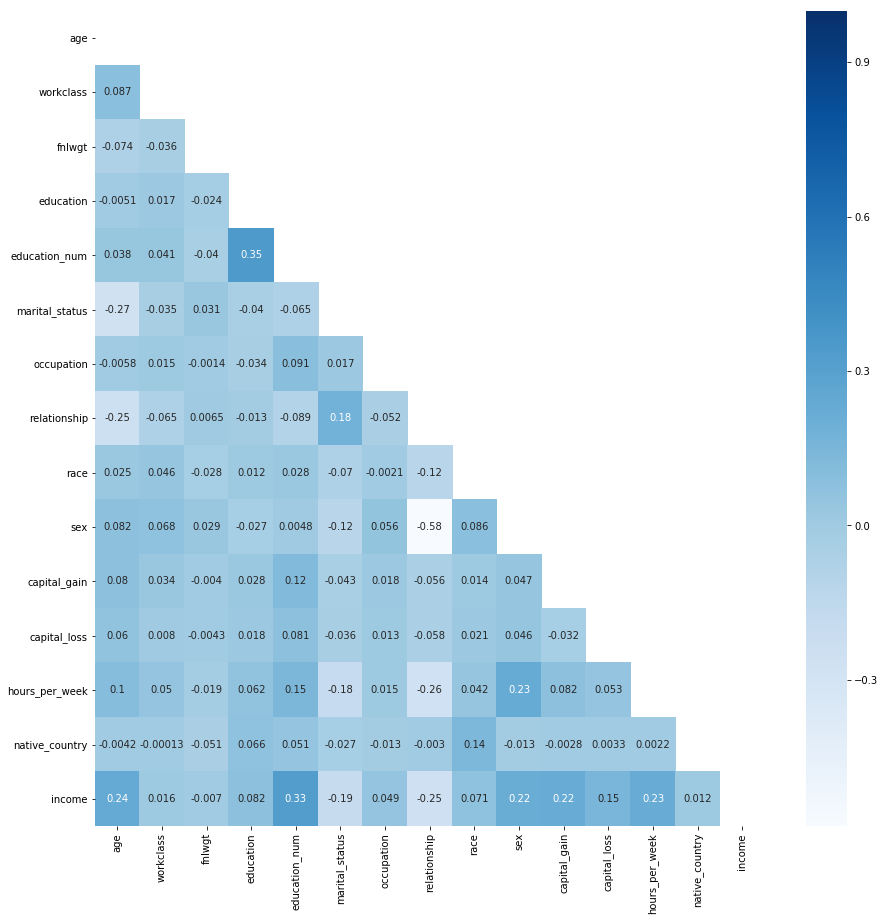

In [20]:
#Correlation of features

#Compute the correlation matrix for the dataset
corr = df_encoded.corr()

# Generate mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up matplotlib figure
f, ax=plt.subplots(figsize=(15,15))

#Generate heat map
sns.heatmap(corr, cmap="Blues", annot=True, mask=mask);

#### Observations

* Highest correlation (compared with other correlation values in this case) between education and education_num features; this can also be observed in the descriptive statistics, the mean and standard deviation values are very close to each other; one of them can be removed.

In [21]:
df_encoded.drop(['education_num'], axis=1, inplace=True)

In [22]:
df_encoded.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,5,77516,9,4,0,1,4,1,2174,0,40,39,0
1,50,4,83311,9,2,3,0,4,1,0,0,13,39,0
2,38,2,215646,11,0,5,1,4,1,0,0,40,39,0
3,53,2,234721,1,2,5,0,2,1,0,0,40,39,0
5,37,2,284582,12,2,3,5,4,0,0,0,40,39,0


### Normalization

Before normalizing the dataset we need to define X and y in order to model whether or not a person's income exceeds 50K a year.

When training a machine learning model is important to normalize in order to prevent certain features from dominating or biasing the training.

In [23]:
# Define X and y

X = df_encoded[df_encoded.columns[:-1]]   #since the last column is the target, we don't include it in the partitiion
y = df_encoded.income                     #target column

In [24]:
#check shape of the two partitions

print(X.shape)
print(y.shape)

(44244, 13)
(44244,)


In [25]:
# Normalize

for col in X.columns:
    X[col] = (X[col]-min(X[col]))/ (max(X[col]) - min(X[col]));

X.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.301370,0.833333,0.043350,0.600000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.95122
1,0.452055,0.666667,0.047274,0.600000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.95122
2,0.287671,0.333333,0.136877,0.733333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.95122
3,0.493151,0.333333,0.149792,0.066667,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.95122
5,0.273973,0.333333,0.183552,0.800000,0.333333,0.230769,1.0,1.0,0.0,0.00000,0.0,0.397959,0.95122


------------

## Modeling
### -- Logistic Regression Model --

Logistic Regression is a model that tells the probability of belonging to one group vs another. The linear regresiion is transformed in a way that the outcome takes a value between 0 and 1. 

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [27]:
# Split the data into train and test sets 75-25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)   

In [28]:
# Make sure no values are lost, make sure split was 25%

print(y_train.value_counts())
print(y_test.value_counts())

0    24988
1     8195
Name: income, dtype: int64
0    8258
1    2803
Name: income, dtype: int64


#### Create a standard logistic regression model
No weights will be passed in this model, it means both classes will be given equal importance. 

In [29]:
logreg = LogisticRegression(fit_intercept=False, C=1e12)        # C, smaller values specify stronger regularization.
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

##### Output probabilities for each class: the class with the highest probability is taken as the prediction

In [30]:
probabilities = model_log.predict_proba(X_test)
print(probabilities[:10,:])                        #print the first 10 values

[[0.29500679 0.70499321]
 [0.70727062 0.29272938]
 [0.86499488 0.13500512]
 [0.9562363  0.0437637 ]
 [0.86012307 0.13987693]
 [0.92937337 0.07062663]
 [0.93228893 0.06771107]
 [0.63935295 0.36064705]
 [0.94113793 0.05886207]
 [0.68131724 0.31868276]]


#### Observations

The first column is the probability of an income <=50K, the second column is the probability of an income >50K. As we observe here in only these ten values, it looks that an income less or equal than 50K has more probabilities (higher values) which is very similar to what the initial plot represented for that feature. 

## Interpretation

### Performance Metrics / Model Evaluation

In [31]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

In [32]:
# Create predictors

predictions = logreg.predict(X_test)

In [33]:
# Overall accuracy
print(accuracy_score(predictions, y_test)*100)

79.45936172136335


In [34]:
# Confusion matrix

cnf_matrix = confusion_matrix(predictions, y_test)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[7928 1942]
 [ 330  861]]


* True Positives (7928): The model predicted a person's income > 50k, and it's actually true.
* True Negatives (861): The model predicted a person's income <= 50K, and it's actually true 
* False Positives (330): The model predicted  a person's income > 50K and hey actually have an income <= 50K
* False Negatives (1942): The model predicted a person's income <= 50K but they actually have an income > 50K.

In [35]:
metrics = precision_recall_fscore_support(predictions, y_test)

print('            <= 50K      > 50k')
print('Num Cases   %0.2f' % metrics[3][0] + '   %0.2f' % metrics[3][1])
print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1])
print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1])
print('F1 Score    %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1])

            <= 50K      > 50k
Num Cases   9870.00   1191.00
Precision   0.96      0.31
Recall      0.80      0.72
F1 Score    0.87      0.43


#### Observations

The model worked well for incomes (of or less than) 50K, for incomes greater than 50K the F1 Score is really low which means the model did not do well for this part of the target.

#### AUC / AUROC
Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) can be used to help determine the best precision-recall tradeoff for the classifier.

AUC: 0.7896645612116624


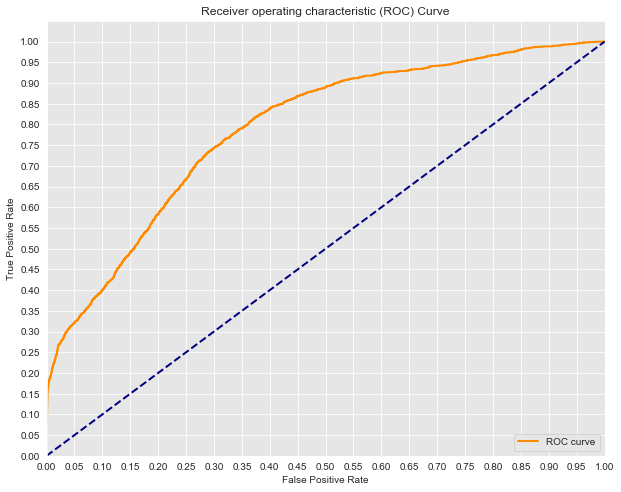

In [36]:
#built-in roc_curve method returns the fpr, tpr and thresholds

#probability scores of each of the datapoints
y_score = logreg.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

#Plot
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

According to the ROC curve, the model will be considered good overall, with a precision of 78.7%, very close to the accuracy score obtained before (79.5%)

## Model Comparisons: evaluate performance

### Add a curve to the ROC graph from the train set

Test AUC: 0.7896645612116624
Train AUC: 0.786902735887967


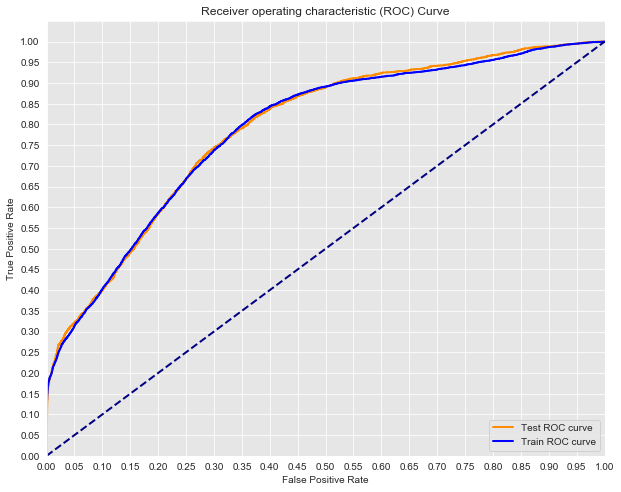

In [37]:
y_test_score = logreg.decision_function(X_test)
y_train_score = logreg.decision_function(X_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_score)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_score)

print('Test AUC: {}'.format(auc(fpr_test, tpr_test)))
print('Train AUC: {}'.format(auc(fpr_train, tpr_train)))

#Plot
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2

plt.plot(fpr_test, tpr_test, color='darkorange', lw=lw, label='Test ROC curve')
plt.plot(fpr_train, tpr_train, color='blue', lw=lw, label='Train ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()

#### Observations
The accuracy for both sets are almost the same, this is reflected in the graph above.

### Altering the regularization parameter
Regularization parameters between 1 and 20 are the recommendation.

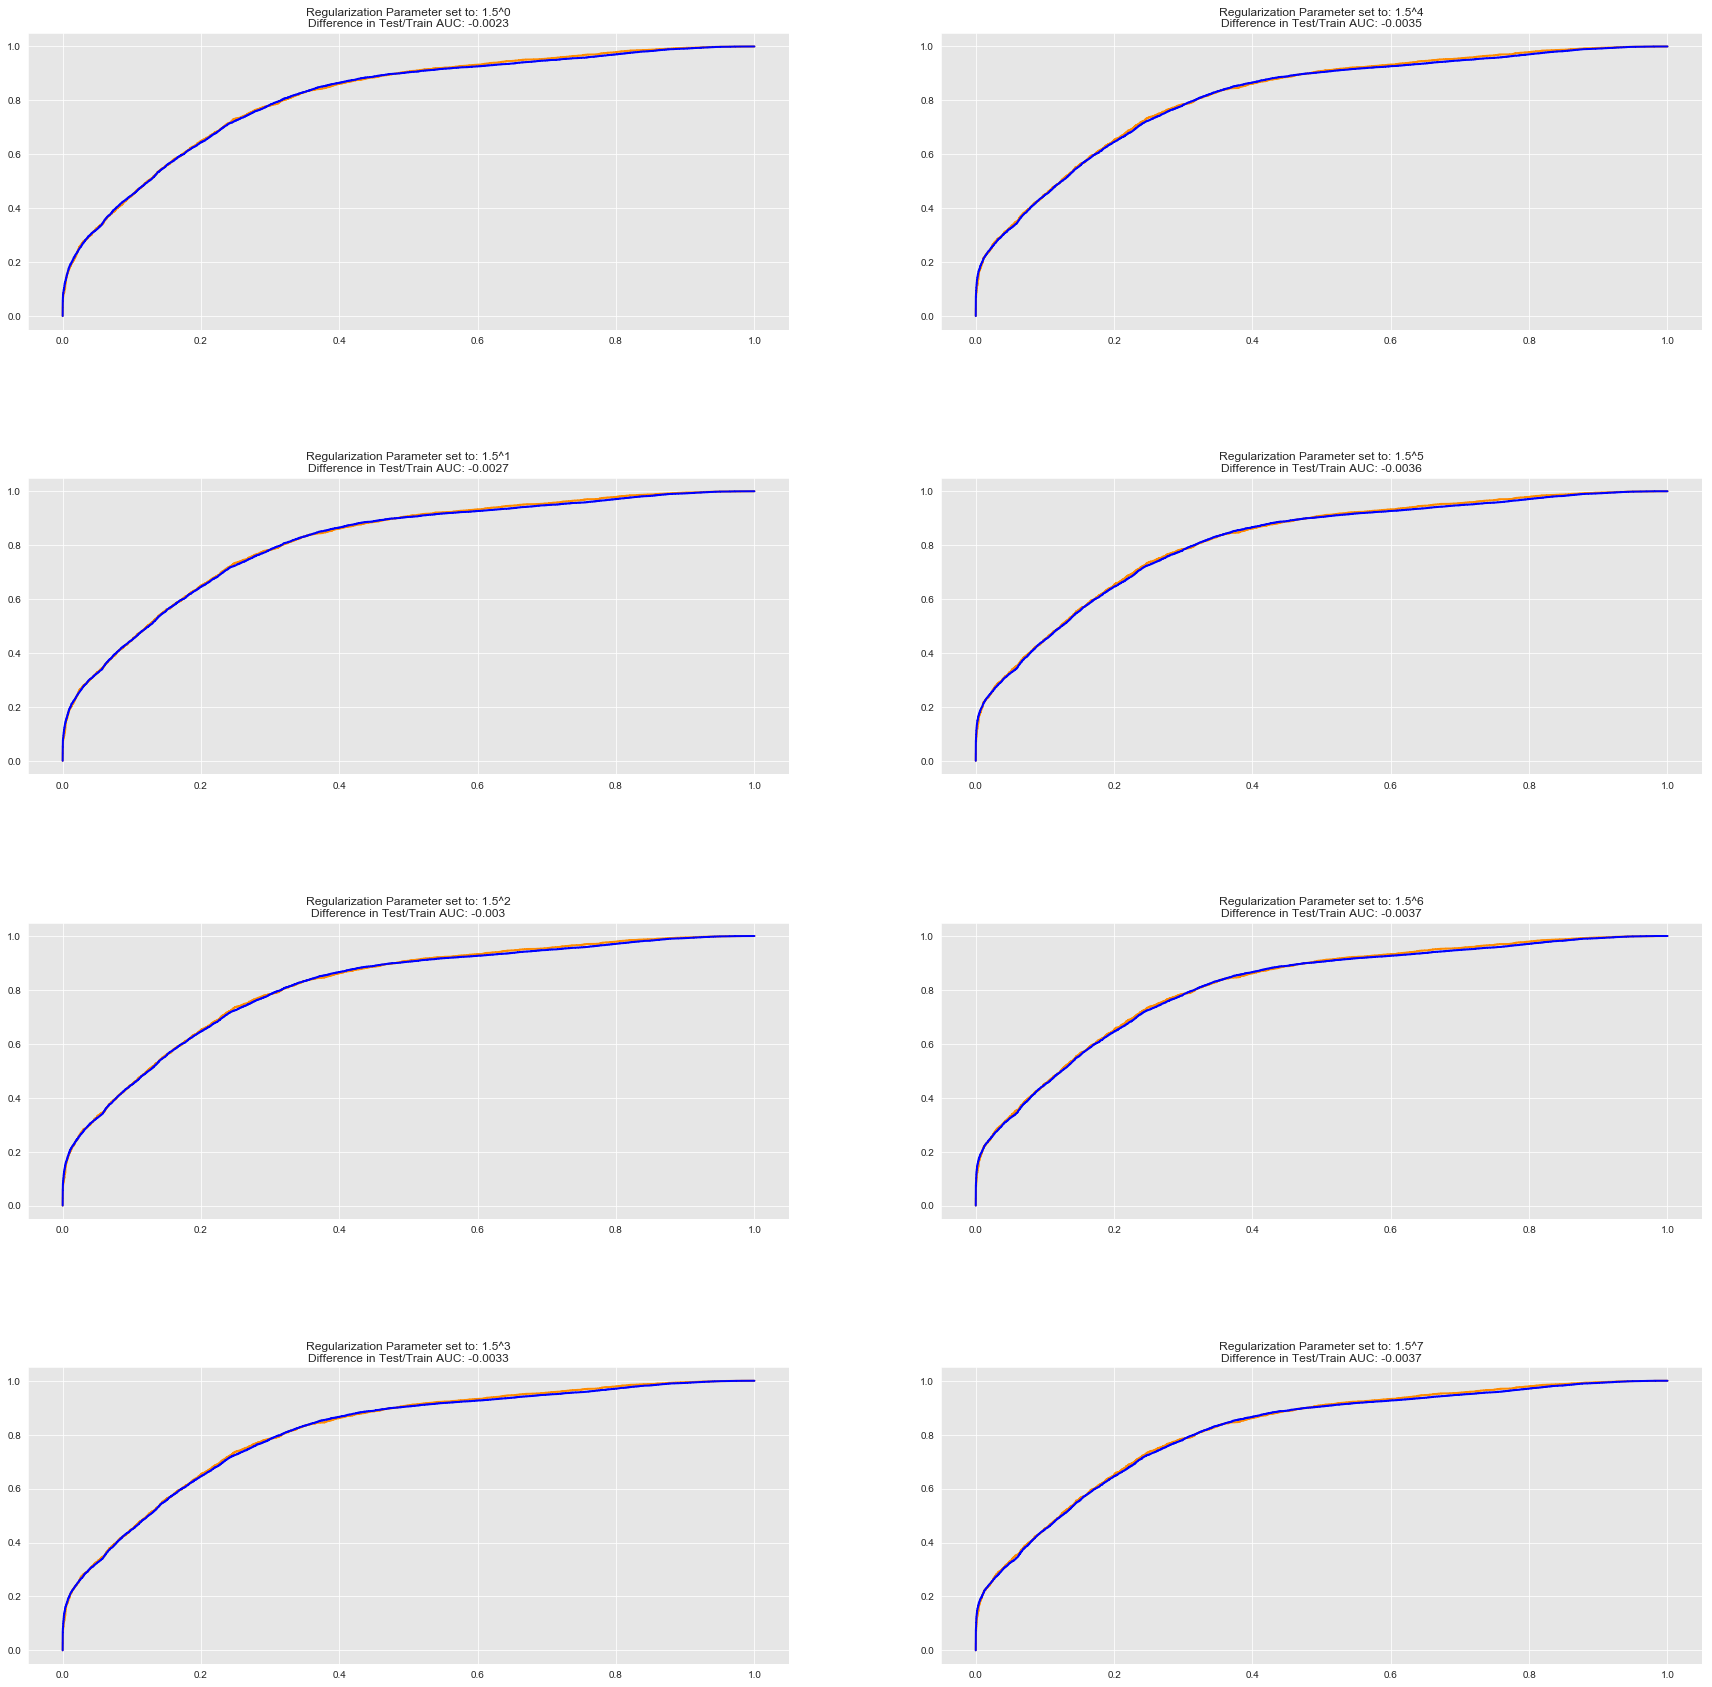

In [38]:
#Code from Logistic Regression Model Comparisons Lab

fig, axes = plt.subplots(4,2, figsize=(30,30))

for n in range(8):
    i = n%4
    j = n//4
    ax = axes[i,j]
    
    #Fit a model
    logreg_3 = LogisticRegression(fit_intercept=True, C=1.5**(n))
    logreg_3.fit(X_train, y_train)
    
    #Print Stats
    y_test_score_3 = logreg_3.decision_function(X_test)
    y_train_score_3 = logreg_3.decision_function(X_train)

    test_fpr_3, test_tpr_3, test_thresholds_3 = roc_curve(y_test, y_test_score_3)
    train_fpr_3, train_tpr_3, train_thresholds_3 = roc_curve(y_train, y_train_score_3)
    
    test_auc_3 = auc(test_fpr_3, test_tpr_3)
    train_auc_3 = auc(train_fpr_3, train_tpr_3)
    auc_diff_3 = round(train_auc_3 - test_auc_3, 4)

    # Add the plot
    ax.plot(test_fpr_3, test_tpr_3, color='darkorange', lw=lw, label='Test ROC curve')
    ax.plot(train_fpr_3, train_tpr_3, color='blue', lw=lw, label='train ROC curve')
    
    ax.set_title('Regularization Parameter set to: 1.5^{}\nDifference in Test/Train AUC: {}'.format(n, auc_diff_3))

    plt.subplots_adjust(hspace=0.5, wspace=0.2)


### Observations
It's hard to make a conclusion on the performance of this classifier, adjusting the C parameter makes a very small difference in the model.

## Class Imbalance
As observed in the confusion matrix, the classes are imbalanced. I will tune the model with various class weights to see if I can get a better ROC curve.

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
AUC for None: 0.7896645612116624
 
LogisticRegression(C=1000000000000.0, class_weight='balanced', dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
AUC for Balanced: 0.7982114360915074
 
LogisticRegression(C=1000000000000.0, class_weight={1: 2, 0: 1}, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
AUC for 2 to 1: 0.7956006638218557
 
LogisticRegression(C=1000000000000.0, class_

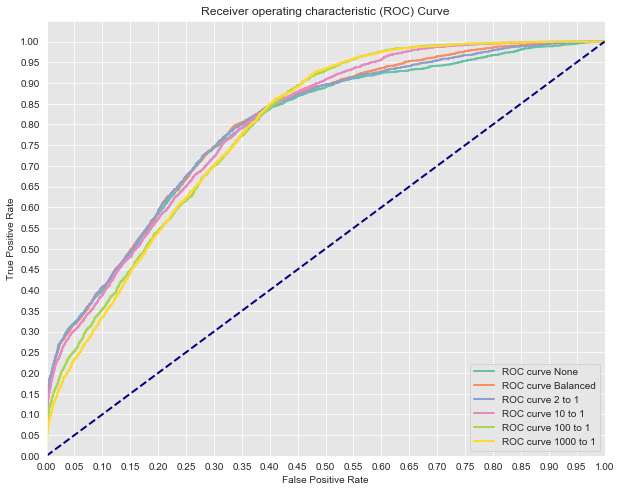

In [39]:
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    #Fit a model
    logreg_4 = LogisticRegression(fit_intercept=False, C=1e12, class_weight=weight) #Starter code
    model_log_4 = logreg_4.fit(X_train, y_train)
    print(model_log_4) #Preview model params

    #Predict
    y_hat_test = logreg_4.predict(X_test)

    y_score = logreg_4.decision_function(X_test)

    fpr_4, tpr_4, thresholds_4 = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr_4, tpr_4)))
    print(' ')
    lw = 2
    plt.plot(fpr_4, tpr_4, color=colors[n], lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Observations
Class weight do not seem to have an impact as they all overlap at one point and none of them show a regular positive case. The AUC score is almost the same for all models.

### -- XGBoost Classifier --

Extreme Gradient BoostingX is a stand-alone library that implements popular gradient boosting algorithms in the fastest, most performant way possible.

In [40]:
import xgboost as xgb

In [50]:
# Creat an xgb instance 

clf = xgb.XGBClassifier()

In [51]:
# Fit the model
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [52]:
# Make predictions
preds_xgb_train = clf.predict(X_train)

In [53]:
preds_xgb_test = clf.predict(X_test)

In [54]:
# Validate accuracy
train_accuracy = accuracy_score(y_train, preds_xgb_train)

In [55]:
test_accuracy = accuracy_score(y_test, preds_xgb_test)

In [56]:
print("Training Accuracy: {:.4}%".format(train_accuracy * 100))
print("Validation accuracy: {:.4}%".format(test_accuracy * 100))

Training Accuracy: 86.45%
Validation accuracy: 85.98%


#### Tuning XGBoost

In [59]:
from sklearn.model_selection import GridSearchCV

In [57]:
#https://xgboost.readthedocs.io/en/latest/parameter.html
#Parameters for tree booster

param_grid = {
    "learning_rate":[0, 1],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [0.5],
    'n_estimators': [5, 30, 100, 250],
}

In [60]:
grid_clf = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")

for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, preds_xgb_train)
val_accuracy = accuracy_score(y_test, preds_xgb_test)

print(" ")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 1
max_depth: 6
min_child_weight: 10
n_estimators: 5
subsample: 0.5
 
Training Accuracy: 86.45%
Validation accuracy: 85.98%


### Observation
No changes in the accuracy score, this means that there is no sign of the model overfitting. 

## Summary

* Used logistic regression to build a binary classifier to predict income.
* According to the Logistic Regression Model, plain accuracy is in the range of 78.5% and 79.5%
* The XGBoost model gives a better accuracy value for training (86.45)  and test (85.98) sets. 
* XGBoost is a better algorithm to apply in this data set. 
* Given more time I would have trained more models to compare the results.

# Sources


* Dua, D. and Karra Taniskidou, E. (2017). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.  http://archive.ics.uci.edu/ml/datasets/Census+Income
